<a href="https://colab.research.google.com/github/nalymugwe/DataCquence-Capstone-Project/blob/main/Data_Cquence_Capstone_Project_B_Measurement_and_Analysis_of_Youtube_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check work directory
!pwd

/content


In [2]:
#Mount Colab onto Google Drive for easier extraction of files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import the operating system and confirm the list of files.
import os
os.chdir('/content/gdrive/MyDrive/Data Science/Data')
!ls

 01_heights_weights_genders.csv
 BR_youtube_trending_data.csv
 CA_youtube_trending_data.csv
 DE_youtube_trending_data.csv
 FR_youtube_trending_data.csv
 GB_youtube_trending_data.csv
 IN_youtube_trending_data.csv
 JP_youtube_trending_data.csv
 KR_youtube_trending_data.csv
 ks-projects-201801.csv
'Measurement and analysis of Youtube Trending Videos.gdoc'
 MX_youtube_trending_data.csv
'Project ideas to tackle.gdoc'
 RU_youtube_trending_data.csv
 services_annual_dataset.zip
 US_youtube_trending_data.csv
 WineKMC.csv
 YouTubedata_20210106_220013B.csv
 Youtubedata_20210109_213012A.csv
 YoutubeData.csv


In [4]:
#Import libraries

import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import glob
import seaborn as sns


In [5]:
#Import the data

TrendingData = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/YoutubeData.csv')
TrendingData.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada


In [6]:
TrendingData.describe()

,category_id,views,likes,dislikes,comment_count
count,375942.000000,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05
mean,20.232302,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03
std,7.132413,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02
50%,23.000000,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02
75%,24.000000,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [7]:
#Check info on the data

TrendingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   publish_date            375942 non-null  object
 5   category_id             375942 non-null  int64 
 6   publish_time            375942 non-null  object
 7   tags                    375942 non-null  object
 8   views                   375942 non-null  int64 
 9   likes                   375942 non-null  int64 
 10  dislikes                375942 non-null  int64 
 11  comment_count           375942 non-null  int64 
 12  thumbnail_link          375942 non-null  object
 13  comments_disabled       375942 non-null  bool  
 14  ratings_disabled        375942 non-n

In [8]:
# Convert the trending date column to datetime format
TrendingData['trending_date']= pd.to_datetime(TrendingData['trending_date'])

# Convert the publish column to datetime format
TrendingData['publish_date']= pd.to_datetime(TrendingData['publish_date'])
 
# Check the format of the converted columns
TrendingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                375942 non-null  object        
 1   trending_date           375942 non-null  datetime64[ns]
 2   title                   375942 non-null  object        
 3   channel_title           375942 non-null  object        
 4   publish_date            375942 non-null  datetime64[ns]
 5   category_id             375942 non-null  int64         
 6   publish_time            375942 non-null  object        
 7   tags                    375942 non-null  object        
 8   views                   375942 non-null  int64         
 9   likes                   375942 non-null  int64         
 10  dislikes                375942 non-null  int64         
 11  comment_count           375942 non-null  int64         
 12  thumbnail_link          375942

In [9]:
#Calculate the number of days between the trending date and the publish date

TrendingData2 = TrendingData
TrendingData2['difference_in_date'] = abs(TrendingData2['trending_date'] - TrendingData2['publish_date']).dt.days
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1


In [10]:
#Get the day of the week of the publish date

TrendingData2['publish_day'] = TrendingData2['publish_date'].dt.day_name()
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date,publish_day
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9,Thursday
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0,Friday
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1,Sunday
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1,Saturday
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1,Thursday


In [11]:
# Convert the publish time column to datetime format
TrendingData2['publish_time']= pd.to_datetime(TrendingData['publish_time'])

#Change the publish time to show the hour without the minutes and seconds
TrendingData2['publish_hour'] = TrendingData2['publish_time'].dt.hour
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date,publish_day,publish_hour
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,2021-07-27 16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9,Thursday,16
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,2021-07-27 01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0,Friday,1
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,2021-07-27 05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1,Sunday,5
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,2021-07-27 12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1,Saturday,12
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,2021-07-27 03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1,Thursday,3


In [12]:
#Count the tag words

TrendingData2['tag_count'] = TrendingData2['tags'].str.len()
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date,publish_day,publish_hour,tag_count
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,2021-07-27 16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9,Thursday,16,228
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,2021-07-27 01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0,Friday,1,123
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,2021-07-27 05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1,Sunday,5,214
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,2021-07-27 12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1,Saturday,12,501
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,2021-07-27 03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1,Thursday,3,128


In [13]:
#Count the title words

TrendingData2['title_count'] = TrendingData2['title'].str.len()
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date,publish_day,publish_hour,tag_count,title_count
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,2021-07-27 16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9,Thursday,16,228,86
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,2021-07-27 01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0,Friday,1,123,56
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,2021-07-27 05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1,Sunday,5,214,80
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,2021-07-27 12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1,Saturday,12,501,62
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,2021-07-27 03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1,Thursday,3,128,52


In [14]:
# Count the description words

TrendingData2['description_count'] = TrendingData2['description'].str.len()
TrendingData2.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,difference_in_date,publish_day,publish_hour,tag_count,title_count,description_count
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,2021-07-27 16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan,9,Thursday,16,228,86,3036.0
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,2021-07-27 01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada,0,Friday,1,123,56,70.0
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,2021-07-27 05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany,1,Sunday,5,214,80,762.0
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,2021-07-27 12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico,1,Saturday,12,501,62,464.0
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,2021-07-27 03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada,1,Thursday,3,128,52,110.0


In [15]:
#Reorder the columns for similar columns to be placed together

UpdatedData = TrendingData2
UpdatedData = UpdatedData[['video_id', 'region', 'publish_date', 'trending_date', 'difference_in_date', 'publish_time', 'publish_hour', 'publish_day', 'title', 'title_count', 'channel_title', 'category_id', 'category_name', 'description', 'description_count', 'tags', 'tag_count', 'views', 'likes', 'ratings_disabled', 'video_error_or_removed']]
UpdatedData.head()

,video_id,region,publish_date,trending_date,difference_in_date,publish_time,publish_hour,publish_day,title,title_count,channel_title,category_id,category_name,description,description_count,tags,tag_count,views,likes,ratings_disabled,video_error_or_removed
0,hLqHZGhIFaI,Great Britan,2017-12-14,2017-12-23,9,2021-07-27 16:10:52,16,Thursday,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,86,Megan Ellaby,22,People & Blogs,Christmas is getting close so I thought I'd sh...,3036.0,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",228,23519,683,False,False
1,7N3ERfi6WHM,Canada,2017-12-08,2017-12-08,0,2021-07-27 01:48:02,1,Friday,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,56,FilmSelect Trailer,24,Entertainment,Here is the first official Trailer for Jurassi...,70.0,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",123,285940,4592,False,False
2,KSkyxpieUI0,Germany,2017-12-03,2017-12-04,1,2021-07-27 05:06:13,5,Sunday,Alistair Overeem vs Francis Ngannou - FULL FIG...,80,BLACK TIGER,17,Sports,Alistair Overeem vs Francis Ngannou - UFC 218\...,762.0,"Alistair Overeem vs Francis Ngannou|""Alistair ...",214,534912,1250,False,False
3,Vz1GJUuYzJc,Mexico,2018-01-13,2018-01-14,1,2021-07-27 12:00:02,12,Saturday,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,62,IDEAS EN 5 MINUTOS,26,Howto & Style,Manualidades creativas y hermosas que puedes h...,464.0,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",501,46423,1077,False,False
4,e1zA-Bk50XI,Canada,2018-04-26,2018-04-27,1,2021-07-27 03:25:21,3,Thursday,Maple Leafs Post-Game: Mike Babcock - April 25...,52,Toronto Maple Leafs,17,Sports,Head coach Mike Babcock addresses the media fo...,110.0,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",128,37107,263,False,False


In [16]:
# Check the format of the reordered columns
UpdatedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                375942 non-null  object        
 1   region                  375942 non-null  object        
 2   publish_date            375942 non-null  datetime64[ns]
 3   trending_date           375942 non-null  datetime64[ns]
 4   difference_in_date      375942 non-null  int64         
 5   publish_time            375942 non-null  datetime64[ns]
 6   publish_hour            375942 non-null  int64         
 7   publish_day             375942 non-null  object        
 8   title                   375942 non-null  object        
 9   title_count             375942 non-null  int64         
 10  channel_title           375942 non-null  object        
 11  category_id             375942 non-null  int64         
 12  category_name           373204

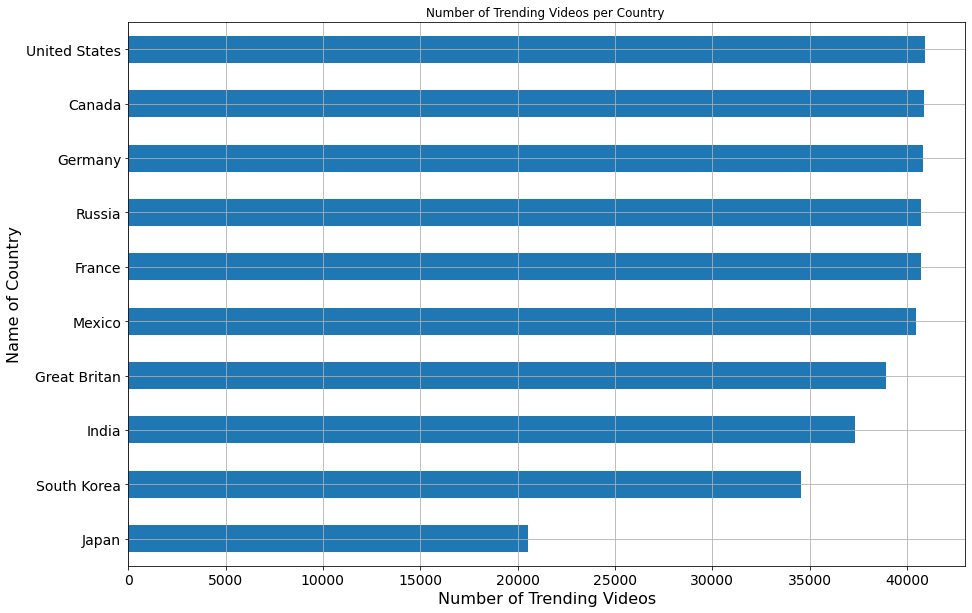

In [17]:
PerRegion = UpdatedData.groupby('region').count()['title'].sort_values()

PerRegion.plot(kind='barh',title='Number of Trending Videos per Country ',grid=True,fontsize=14,figsize=(15,10))
plt.xlabel("Number of Trending Videos",fontsize=16) 
plt.ylabel("Name of Country",fontsize=16)
plt.show()



In [18]:
#Observation
# There seems to be a balanced trend on how the videos have trended through the regions. USA, Canada and Germany top the list and Japan has the lowest numbers compared to the other countries. Could it be they spend less time on Youtube compared to the other listed countries?

<Figure size 432x288 with 0 Axes>

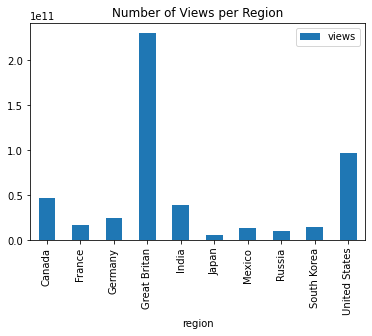

In [19]:
#View data by the number of views per region 

RegionViews=UpdatedData.groupby(by=['region'],as_index=False).views.sum()
plt.figure()
RegionViews.plot.bar('region', 'views')
plt.title('Number of Views per Region')
plt.show()

<Figure size 432x288 with 0 Axes>

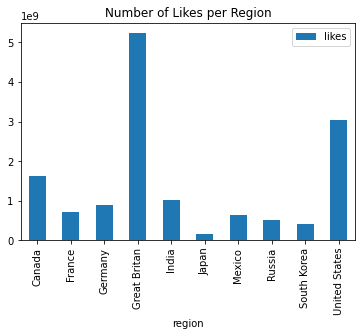

In [20]:
#View data by the number of likes per region 

RegionLikes=UpdatedData.groupby(by=['region'],as_index=False).likes.sum()
plt.figure()
RegionLikes.plot.bar('region', 'likes')
plt.title('Number of Likes per Region')
plt.show()

In [21]:
# Observation:
# The number of views and likes in each region highly correlate with each other. An interesting observation here is that the highest views and likes are coming from Great Britain but if we check the previous pie chart, the United States ranked the highest with the trending videos. This could only mean that most of the views and likes come from Great Britain and not their own country.


difference_in_date
0        19259
1       174899
2        73243
3        30117
4        15656
         ...  
3987         1
3988         1
3989         1
3990         1
4215         1
Name: title, Length: 1029, dtype: int64

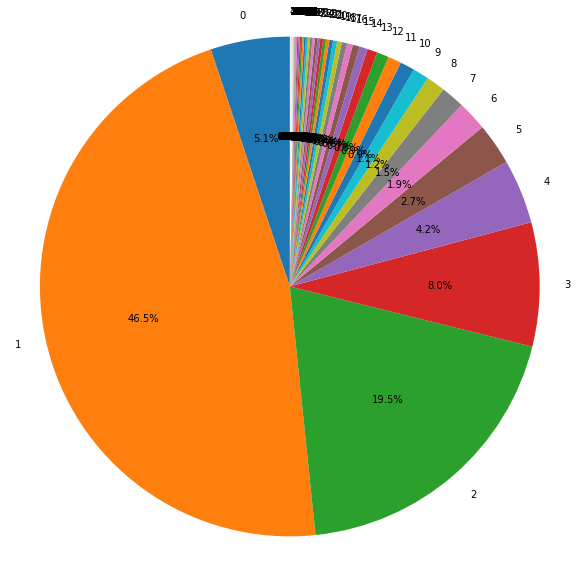

In [22]:
#Analyze the number of days it takes from publish date to trending date

labels = UpdatedData.groupby(['difference_in_date']).count().index
sizes = UpdatedData.groupby(['difference_in_date']).count()['title']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  
sizes

In [23]:
#View it in a table format

Grouped_UpdatedData = UpdatedData.groupby(['difference_in_date']).agg({'difference_in_date': 'count'})
Grouped_UpdatedData.head(20)

,difference_in_date
difference_in_date,
0,19259
1,174899
2,73243
3,30117
4,15656
5,10141
6,7247
7,5769
8,4597


In [24]:
# Observation:
# 46.5% of trending videos trend after one day of it being published. This number gradually decreases as the days go by. This is a very short life span meaning if you haven’t captured your audience by day 5, there’s a 14% chance that your video will trend post publish date. 


<Figure size 432x288 with 0 Axes>

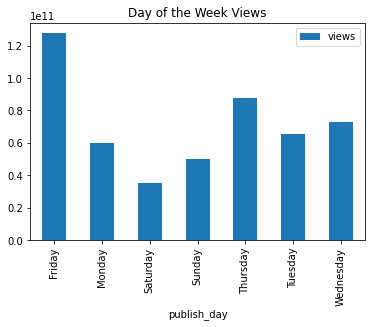

In [25]:
#View data by the day of the week vs the number of views

DayofWeek=UpdatedData.groupby(by=['publish_day'],as_index=False).views.sum()
plt.figure()
DayofWeek.plot.bar('publish_day', 'views')
plt.title('Day of the Week Views')
plt.show()

<Figure size 432x288 with 0 Axes>

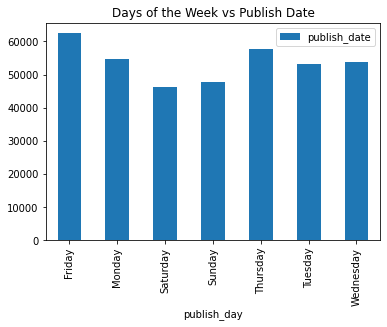

In [26]:
#View data by the day of the week vs the publish date

PublishDateViews=UpdatedData.groupby(by=['publish_day'],as_index=False).publish_date.count()
plt.figure()
PublishDateViews.plot.bar('publish_day', 'publish_date')
plt.title('Days of the Week vs Publish Date')
plt.show()

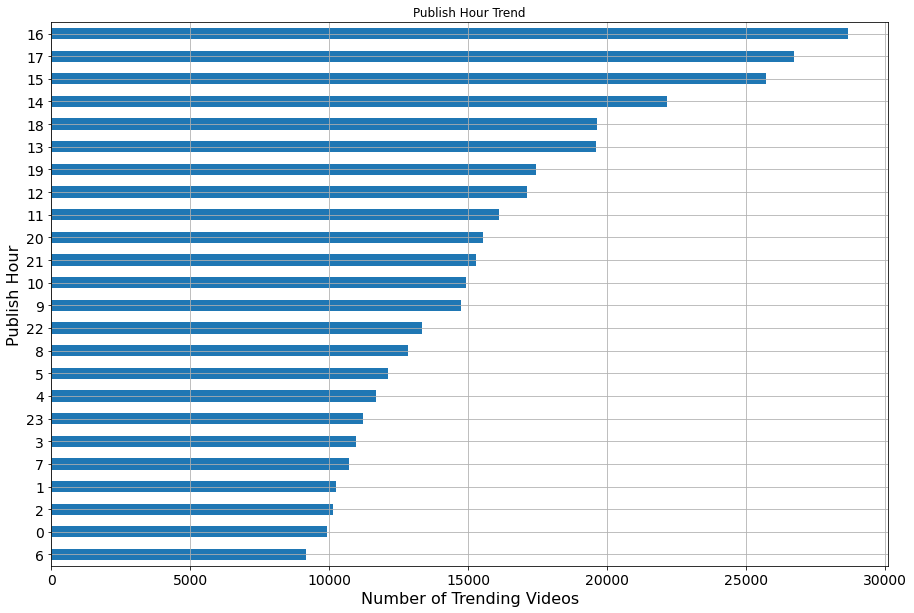

In [27]:
PublishHour = UpdatedData.groupby('publish_hour').count()['title'].sort_values()

PublishHour.plot(kind='barh',title='Publish Hour Trend',grid=True,fontsize=14,figsize=(15,10))
plt.xlabel("Number of Trending Videos",fontsize=16) 
plt.ylabel("Publish Hour",fontsize=16)
plt.show()


In [28]:
# Observation:
# The most popular timings are 4:00 PM, 5:00 PM and 3:00 PM consecutively.


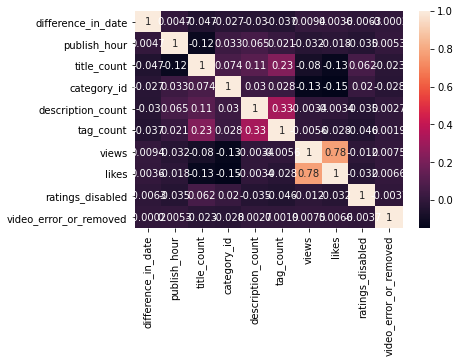

In [29]:
#Visualize the correlation patterns
corr = UpdatedData.corr()
plt.figure()
sns.heatmap(corr, annot=True);

In [30]:
# Observation:
# The highly correlated variables are views where an increase in the number of views increases the number of likes and vice versa. There seems to be a negative correlation on the title count and a low correlation with the tag count. The number of words posted on a Youtube video title or the number of tags doesn’t count to the number of views you will get.


In [31]:
#Statistical Summary of the numerical data

UpdatedData.describe()


,difference_in_date,publish_hour,title_count,category_id,description_count,tag_count,views,likes
count,375942.000000,375942.000000,375942.000000,375942.000000,356464.000000,375942.000000,3.759420e+05,3.759420e+05
mean,7.498268,12.765525,63.794976,20.232302,938.123645,266.276356,1.326568e+06,3.788431e+04
std,97.363787,6.242955,30.883554,7.132413,941.033607,206.633455,7.098568e+06,1.654131e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.170000e+02,0.000000e+00
25%,1.000000,8.000000,42.000000,17.000000,302.000000,93.000000,4.697800e+04,6.690000e+02
50%,1.000000,14.000000,59.000000,23.000000,655.000000,231.000000,1.773705e+05,3.446000e+03
75%,3.000000,17.000000,81.000000,24.000000,1251.000000,431.000000,6.476792e+05,1.747650e+04
max,4215.000000,23.000000,297.000000,44.000000,11938.000000,1476.000000,4.245389e+08,5.613827e+06


In [32]:
# Observations:
# On average, a video takes 7 days to trend from the date it is published and 75% percent of the videos that were published took 3 days to trend. However we seem to have a major outlier as there was a video that took 4,215 days of it being published to trend. This affected the mean and standard deviation. 

# Most trending videos had an average of 266 tags total. The minimum had 2 tags and the maximum had 1,476 tags. 75% of the trending videos had 431 tags.

# The trending videos had an average title count of 63 words, 75% of the videos having 81 words and the max number of words that a video had was 297. 

# The trending videos had an average description count of 938 words, 75% of the videos having 1,251 words and the max number of words that a video had was 11,938. 

# The average number of views for trending videos was 1.32 million with a 75% percentile of 647,692 views. Interestingly, there’s a trending video that had 117 views and the highest number of views received was 424.5 million. 

# The average number of likes for trending videos was 37,884 which is 2.86% of the liked videos. Minimum number of likes was zero and the maximum number of likes was 5.61 million translating to 1.3% of the maximum number of viewed videos. 


<Figure size 720x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

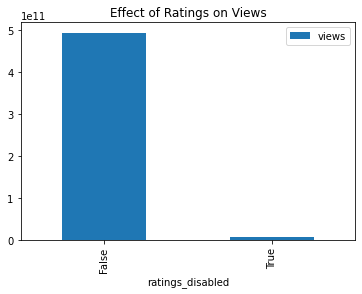

<Figure size 432x288 with 0 Axes>

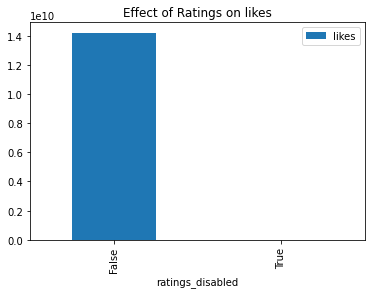

<Figure size 432x288 with 0 Axes>

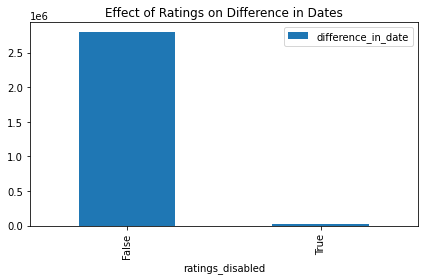

In [33]:
#Review effect of activating the ratings function

plt.figure(figsize=(10,15))

Ratings_DisabledData=UpdatedData.groupby(by=['ratings_disabled'],as_index=False).views.sum()
plt.figure()
Ratings_DisabledData.plot.bar('ratings_disabled', 'views')
plt.title('Effect of Ratings on Views')

Ratings_DisabledData=UpdatedData.groupby(by=['ratings_disabled'],as_index=False).likes.sum()
plt.figure()
Ratings_DisabledData.plot.bar('ratings_disabled', 'likes')
plt.title('Effect of Ratings on likes')

Ratings_DisabledData=UpdatedData.groupby(by=['ratings_disabled'],as_index=False).difference_in_date.sum()
plt.figure()
Ratings_DisabledData.plot.bar('ratings_disabled', 'difference_in_date')
plt.title('Effect of Ratings on Difference in Dates')

plt.tight_layout()
plt.show()

In [34]:
# Observations:

#Disabling the rating feature of a Youtube video has a drastic effect on the number of views, likes and the difference in dates it trends from the publish date. This is one feature that should not be disabled for maximum viewership and eventually to a trending video.


category_name
Autos & Vehicles           4734
Comedy                    26970
Education                  7788
Entertainment            109006
Film & Animation          20932
Gaming                    11498
Howto & Style             18856
Movies                       36
Music                     42514
News & Politics           37288
Nonprofits & Activism        57
People & Blogs            54052
Pets & Animals             4863
Science & Technology       8171
Shows                       974
Sports                    23684
Trailers                      5
Travel & Events            1776
Name: views, dtype: int64

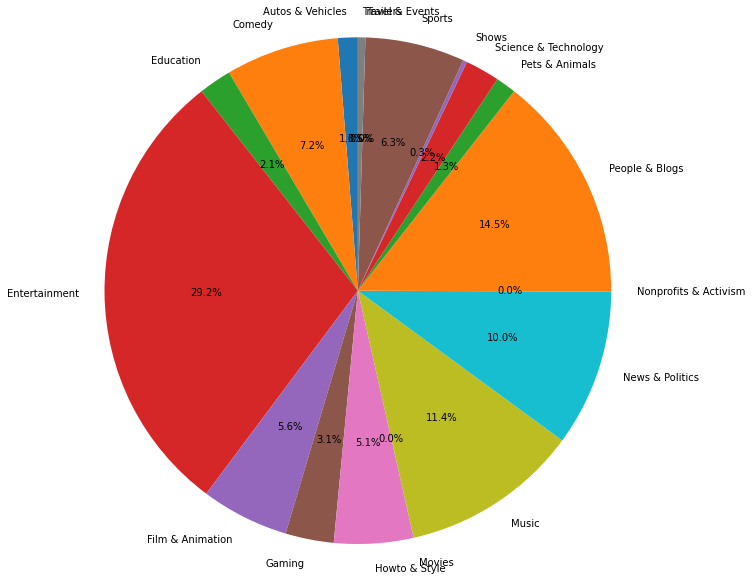

In [35]:
#Check the categories of the trending videos with the highest views

labels = UpdatedData.groupby(['category_name']).count().index
sizes = UpdatedData.groupby(['category_name']).count()['views']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  
sizes

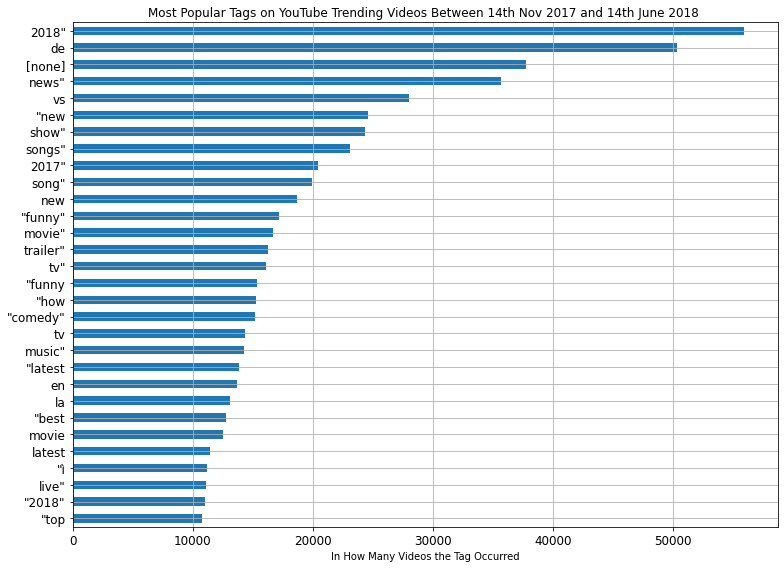

In [36]:
#Generally what were the trending tags during this period for the trended videos

# separate each word in the tags column and add them onto a list of strings
# first split by '|' and send to a list.
tags = UpdatedData.tags.str.split('|').tolist()
# then get rid of anything that isn't a list
tags = [x for x in tags if type(x) == list]

# that gave us a list of lists (of strings), so we must separate the items in each 
tags2 = []
tags3 = []
for item in tags:
    for string in item:
        # get rid of numbers and other types
        if type(string) == str:
            tags2.append(string)

def meaningless(x):
    words = ['to','the','a','of','and','on','in','for','is','&','with','you','video','videos','"','"the','video"','videos"']
    return x in words

# now let's split these strings by the spaces between words
for multiple in tags2:
    singles = multiple.split()
    # then let's add these cleaned tags to the final list
    for tag in singles:
        # now let's make everything lowercase and get rid of spaces
        tag = tag.strip()
        tag = tag.lower()
        # now let's remove the meaningless tags   
        if not meaningless(tag):
            tags3.append(tag)

# let's bring that into a dataframe
tagsdf = pd.DataFrame(tags3,columns=['tags'])
# then count the values
tagcounts = tagsdf.tags.value_counts()

# now preparing a bar chart representing the top values
tagcountslice = tagcounts[:30].sort_values()
tagcountslice.plot(kind='barh',title='Most Popular Tags on YouTube Trending Videos Between 14th Nov 2017 and 14th June 2018 ',grid=True,fontsize=12,figsize=(11,8))
plt.xlabel('In How Many Videos the Tag Occurred')

plt.tight_layout()
plt.show()


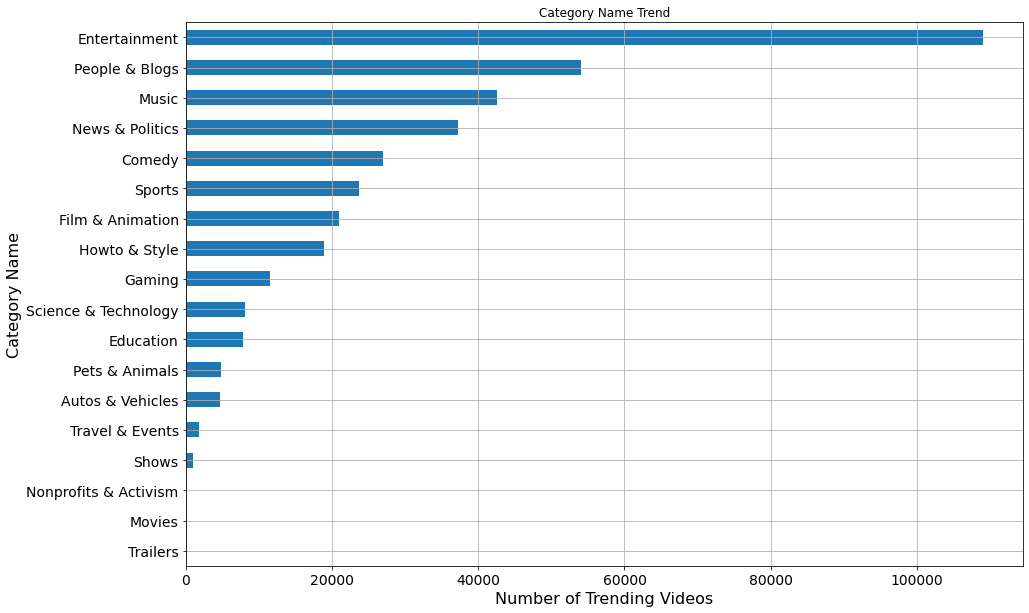

In [37]:
CategoryViews = UpdatedData.groupby('category_name').count()['title'].sort_values()

CategoryViews.plot(kind='barh',title='Category Name Trend',grid=True,fontsize=14,figsize=(15,10))
plt.xlabel("Number of Trending Videos",fontsize=16) 
plt.ylabel("Category Name",fontsize=16)
plt.show()


Text(0.5, 1.0, 'Categories of trend videos in with no tags')

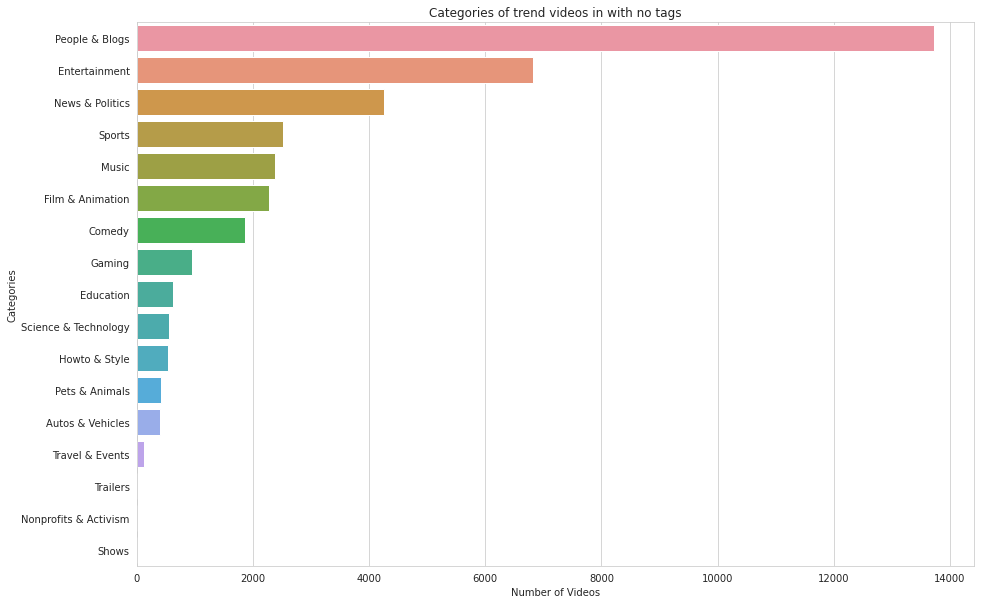

In [38]:
#Check the categories of the trending videos with no tags

NoTagsVideo = UpdatedData[UpdatedData['tags']=='[none]']['category_name'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=NoTagsVideo['index'],x=NoTagsVideo['category_name'], data=NoTagsVideo,orient='h')
plt.xlabel("Number of Videos") 
plt.ylabel("Categories")
plt.title("Categories of trend videos in with no tags")

In [39]:
# Observation:

# The top 3 categories with the highest views are Entertainment, People & Blogs and Music. This is definitely not a surprise indicating that most Youtube users go to Youtube for entertainment and updates from celebrities. 

# The least viewed category is Movies and Trailers meaning that Youtube users prefer to watch movies from other platforms rather than Youtube. Nonprofits & Activism also do not have much of a chance on Youtube as the viewer rate is quite low.


In [42]:
#Download data set that has data that's not specifically trended. This data will be used for creating the predictive model

Set_One = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/Youtubedata_20210109_213012A.csv')
Set_One.head()

,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live
0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0
1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0
2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0
3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0
4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0


In [43]:
Set_Two = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/YouTubedata_20210106_220013B.csv')
Set_Two.head()

,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live
0,0,VKtJkY5w8s0,Every Cold Open | The Office | Season 2 pt 1,10829,163000,0.066436,327.0,8.0,45.0,PT11M52S,The Office. Every Episode. Extras. Exclusives....,2d,hd,False,2021-01-05T17:15:01Z,"['peacock', 'peacock tv', 'peacock streaming s...",24,https://i.ytimg.com/vi/VKtJkY5w8s0/maxresdefau...,NaN,NaN,NaN,0
1,1,Vj-I54YlYTA,Punky Brewster | First 5 Minutes of the Series...,2144,163000,0.013153,84.0,3.0,18.0,PT4M59S,Punky Brewster streaming now on Peacock: https...,2d,hd,False,2021-01-04T14:00:17Z,"['peacock', 'peacock tv', 'peacock streaming s...",24,https://i.ytimg.com/vi/Vj-I54YlYTA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Television_pro...,NaN,0
2,2,J9DUJRABuk4,Making of The Office: The Pilot | A Peacock Extra,670854,163000,4.115669,24378.0,349.0,1022.0,PT5M15S,The Office. Every Episode. Extras. Exclusives....,2d,hd,False,2021-01-01T16:00:06Z,"['peacock', 'peacock tv', 'peacock streaming s...",24,https://i.ytimg.com/vi/J9DUJRABuk4/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Entertainment'...,NaN,0
3,3,JQyX-EZq4hk,Behind the Scenes of The Office 2020 Gelatin M...,43150,163000,0.264724,1290.0,93.0,98.0,PT3M21S,Did you see Oscar Nunez and Kate Flannery blow...,2d,hd,False,2021-01-01T02:00:03Z,"['peacock', 'peacock tv', 'peacock streaming s...",24,https://i.ytimg.com/vi/JQyX-EZq4hk/maxresdefau...,NaN,NaN,NaN,0
4,4,kvJUf6LHILk,The Office | New Year's Resolutions,26329,163000,0.161528,726.0,48.0,81.0,PT2M37S,The Office. Every Episode. Extras. Exclusives....,2d,hd,False,2020-12-31T14:00:23Z,"['peacock', 'peacock tv', 'peacock streaming s...",24,https://i.ytimg.com/vi/kvJUf6LHILk/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Entertainment'...,NaN,0


In [44]:
# Merge all data into one dataframe
Frames = [Set_One, Set_Two]
All_data = pd.concat(Frames, axis=0).reset_index()
All_data.head()

,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0


In [45]:
#Check info on the data

All_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34806 entries, 0 to 34805
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           34806 non-null  int64  
 1   Unnamed: 0        34806 non-null  int64  
 2   index             34806 non-null  object 
 3   title             34806 non-null  object 
 4   view              34806 non-null  int64  
 5   channel_sub       34806 non-null  int64  
 6   view_to_sub       34806 non-null  float64
 7   like              34491 non-null  float64
 8   dislike           34491 non-null  float64
 9   comment           34062 non-null  float64
 10  length            34806 non-null  object 
 11  description       33947 non-null  object 
 12  dimension         34806 non-null  object 
 13  definition        34806 non-null  object 
 14  caption           34806 non-null  bool   
 15  published_at      34806 non-null  object 
 16  tags              28326 non-null  object

In [46]:
# Do a count on the title words

All_data2 = All_data
All_data2['title_count'] = All_data2['title'].str.len()
All_data2.head()

,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live,title_count
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0,31
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,29
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,34
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0,36
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0,38


In [47]:
# Do a count on the description words

All_data3 = All_data2
All_data3['description_count'] = All_data3['description'].str.len()
All_data3.head()

,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live,title_count,description_count
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0,31,340.0
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,29,480.0
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,34,458.0
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0,36,398.0
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0,38,953.0


In [48]:
# Separate the date and time from publised at column

All_data4 = All_data3

All_data4['publish_date'] = pd.to_datetime(All_data4['published_at']).dt.date
All_data4['publish_time'] = pd.to_datetime(All_data4['published_at']).dt.time
All_data4.head()

,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live,title_count,description_count,publish_date,publish_time
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0,31,340.0,2020-12-30,20:00:05
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,29,480.0,2020-12-16,21:49:14
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,34,458.0,2020-12-09,19:00:02
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0,36,398.0,2020-12-02,19:00:08
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0,38,953.0,2020-11-25,19:00:05


In [49]:
# Convert the rows in published date column to datetime.

All_data4['publish_date'] = pd.to_datetime(All_data4['publish_date'])

# Get the day of the week from publish date column. 
from datetime import datetime as dt

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
All_data4['publish_day']=All_data4['publish_date'].dt.weekday.map(dw_mapping)
All_data4.head()



,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live,title_count,description_count,publish_date,publish_time,publish_day
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,1,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0,31,340.0,2020-12-30,20:00:05,Wednesday
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,1,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,29,480.0,2020-12-16,21:49:14,Wednesday
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,1,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,34,458.0,2020-12-09,19:00:02,Wednesday
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,1,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0,36,398.0,2020-12-02,19:00:08,Wednesday
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,1,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0,38,953.0,2020-11-25,19:00:05,Wednesday


In [50]:
#Replace the values of the categoryId with its corresponding name.

All_data5 = All_data4.replace({'category' :{2 : 'Autos & Vehicles' , 1 : 'Film & Animation', 10 : 'Music', 15 : 'Pets & Animals', 17 : 'Sports', 18 : 'Short Movies', 19 : 'Travel & Events', 20 : 'Gaming', 21 : 'Videoblogging', 22 : 'People & Blogs', 23 : 'Comedy', 24 : 'Entertainment', 25 : 'News & Politics', 26 : 'Howto & Style', 27 : 'Education', 28 : 'Science & Technology', 29 : 'Nonprofits & Activism', 30 : 'Movies', 31 : 'Anime/Animation', 32 : 'Action/Adventure', 33 : 'Classics', 34 : 'Comedy', 35 : 'Documentary', 36 : 'Drama', 37 : 'Family', 38 : 'Foreign', 39 : 'Horror', 40 : 'Sci-Fi/Fantasy', 41 : 'Thriller', 42 : 'Shorts', 43 : 'Shows', 44 : 'Trailers'}})
All_data5.head()


,level_0,Unnamed: 0,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,tags,category,thumbnail,localizations,topic_categories,default_language,live,title_count,description_count,publish_date,publish_time,publish_day
0,0,0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,NaN,Film & Animation,https://i.ytimg.com/vi/B0RVWU_nROk/maxresdefau...,NaN,NaN,NaN,0,31,340.0,2020-12-30,20:00:05,Wednesday
1,1,1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,NaN,Film & Animation,https://i.ytimg.com/vi/E9se1YqCRaA/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,29,480.0,2020-12-16,21:49:14,Wednesday
2,2,2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,NaN,Film & Animation,https://i.ytimg.com/vi/AvdW0YKw0XE/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,0,34,458.0,2020-12-09,19:00:02,Wednesday
3,3,3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,NaN,Film & Animation,https://i.ytimg.com/vi/gp3SPyGXKuo/maxresdefau...,NaN,['https://en.wikipedia.org/wiki/Society'],NaN,0,36,398.0,2020-12-02,19:00:08,Wednesday
4,4,4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,NaN,Film & Animation,https://i.ytimg.com/vi/b2WYP057IOI/maxresdefau...,NaN,"['https://en.wikipedia.org/wiki/Food', 'https:...",NaN,0,38,953.0,2020-11-25,19:00:05,Wednesday


In [51]:
#Drop columns not needed

All_data6 = All_data5.drop(columns =['level_0', 'Unnamed: 0', 'tags', 'thumbnail', 'localizations', 'topic_categories', 'default_language'], axis = 1) 
All_data6.head()

,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,category,live,title_count,description_count,publish_date,publish_time,publish_day
0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,Film & Animation,0,31,340.0,2020-12-30,20:00:05,Wednesday
1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,Film & Animation,0,29,480.0,2020-12-16,21:49:14,Wednesday
2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,Film & Animation,0,34,458.0,2020-12-09,19:00:02,Wednesday
3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,Film & Animation,0,36,398.0,2020-12-02,19:00:08,Wednesday
4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,Film & Animation,0,38,953.0,2020-11-25,19:00:05,Wednesday


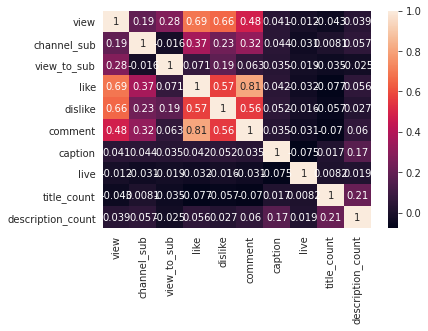

In [52]:
#Visualize the correlation patterns

corr = All_data6.corr()
plt.figure()
sns.heatmap(corr, annot=True);

In [53]:
#Statistical Summary of People & Blogs
All_data6.describe()


,view,channel_sub,view_to_sub,like,dislike,comment,live,title_count,description_count
count,3.480600e+04,3.480600e+04,34806.000000,3.449100e+04,34491.000000,34062.000000,34806.000000,34806.00000,33947.000000
mean,3.927500e+05,1.012619e+06,1.436089,1.407314e+04,341.694819,1138.796988,0.094668,49.39157,1064.842372
std,3.443535e+06,3.877501e+06,17.289745,6.833916e+04,2302.022632,5410.172783,0.292759,20.02338,978.981309
min,0.000000e+00,1.010000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.00000,1.000000
25%,2.103250e+03,1.610000e+04,0.050990,9.100000e+01,2.000000,16.000000,0.000000,35.00000,352.000000
50%,1.580500e+04,1.130000e+05,0.162444,6.840000e+02,15.000000,83.000000,0.000000,47.00000,792.000000
75%,1.042585e+05,5.750000e+05,0.482129,4.680000e+03,90.000000,461.000000,0.000000,62.00000,1438.000000
max,2.584460e+08,7.040000e+07,1490.375135,2.347872e+06,113133.000000,130808.000000,1.000000,100.00000,5000.000000


<Figure size 432x288 with 0 Axes>

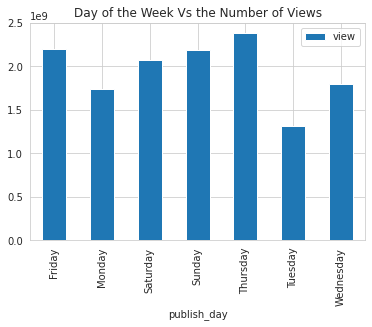

In [54]:
# Analysis showing the days of the week that gets the highest views

All_data6_Views = All_data6.groupby(by=['publish_day'],as_index=False).view.sum()
plt.figure()
All_data6_Views.plot.bar('publish_day', 'view')
plt.title('Day of the Week Vs the Number of Views')
plt.show()

publish_day
Friday       5585
Monday       5005
Saturday     4172
Sunday       4041
Thursday     5389
Tuesday      5122
Wednesday    5492
Name: title, dtype: int64

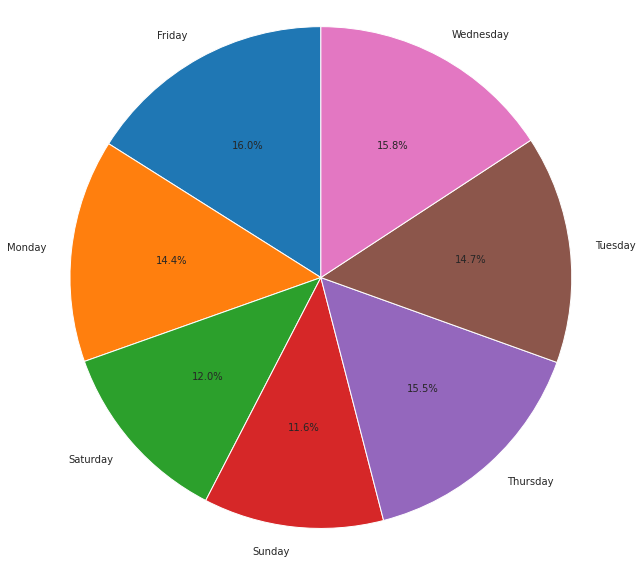

In [55]:
#What is the common publish day

labels = All_data6.groupby(['publish_day']).count().index
sizes = All_data6.groupby(['publish_day']).count()['title']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  
sizes

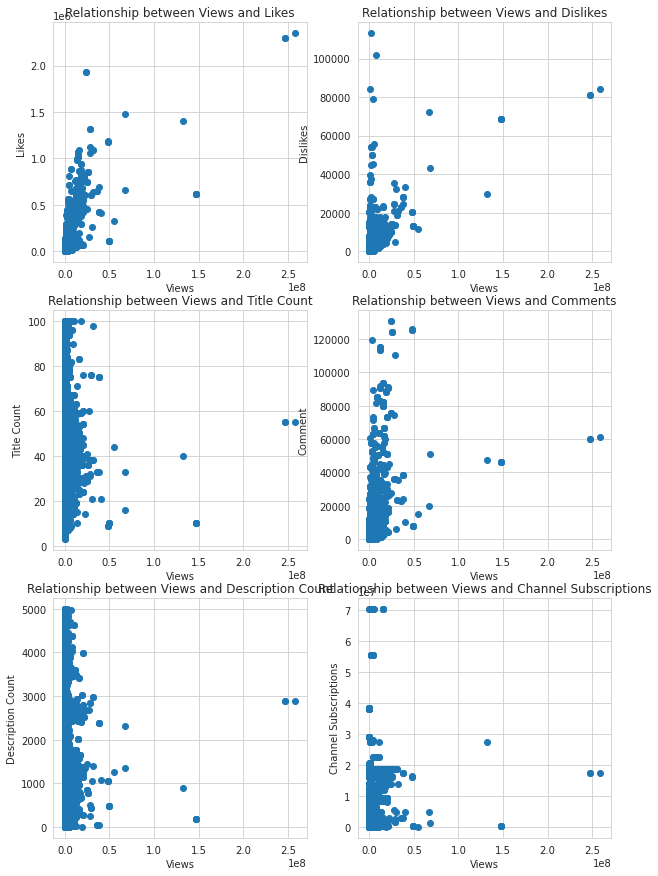

In [56]:
#Relationship between the number of views and the different variables

plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.scatter(All_data6.view, All_data6.like)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title("Relationship between Views and Likes")

plt.subplot(3,2,2)
plt.scatter(All_data6.view, All_data6.dislike)
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.title("Relationship between Views and Dislikes")

plt.subplot(3,2,3)
plt.scatter(All_data6.view, All_data6.title_count)
plt.xlabel('Views')
plt.ylabel('Title Count')
plt.title("Relationship between Views and Title Count")

plt.subplot(3,2,4)
plt.scatter(All_data6.view, All_data6.comment)
plt.xlabel('Views')
plt.ylabel('Comment')
plt.title("Relationship between Views and Comments")

plt.subplot(3,2,5)
plt.scatter(All_data6.view, All_data6.description_count)
plt.xlabel('Views')
plt.ylabel('Description Count')
plt.title("Relationship between Views and Description Count")

plt.subplot(3,2,6)
plt.scatter(All_data6.view, All_data6.channel_sub)
plt.xlabel('Views')
plt.ylabel('Channel Subscriptions')
plt.title("Relationship between Views and Channel Subscriptions")

plt.show()


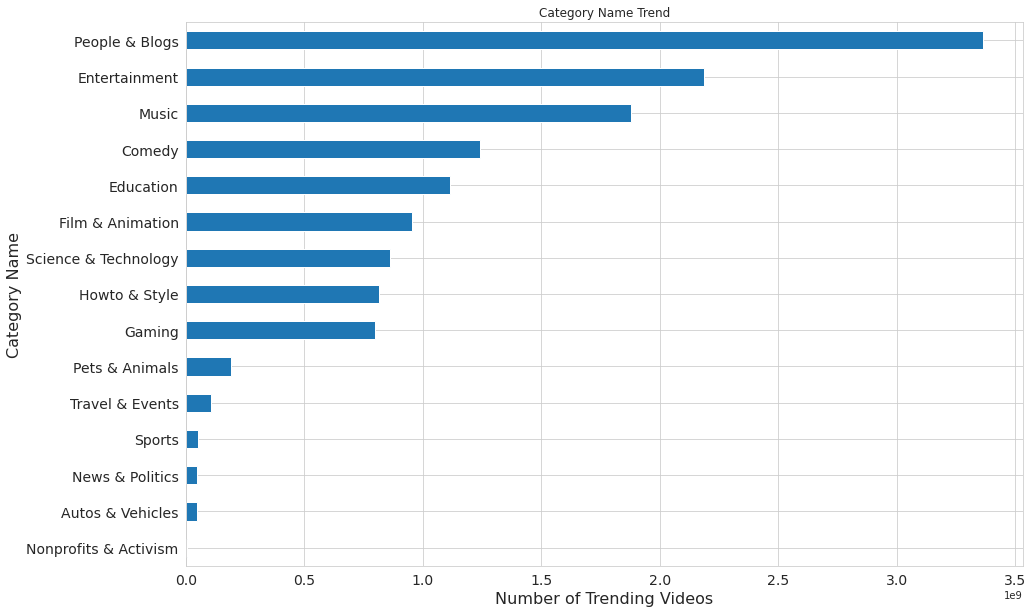

In [57]:
CategoryViews = All_data6.groupby('category').sum()['view'].sort_values()

CategoryViews.plot(kind='barh',title='Category Name Trend',grid=True,fontsize=14,figsize=(15,10))
plt.xlabel("Number of Trending Videos",fontsize=16) 
plt.ylabel("Category Name",fontsize=16)
plt.show()

In [58]:
#Import OneHotCoder library
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

All_data7 = pd.get_dummies(All_data6, columns=['category'], drop_first=True)
pd.set_option("display.max_columns", None)
All_data7.head()


,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,live,title_count,description_count,publish_date,publish_time,publish_day,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,0,31,340.0,2020-12-30,20:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,0,29,480.0,2020-12-16,21:49:14,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,0,34,458.0,2020-12-09,19:00:02,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,0,36,398.0,2020-12-02,19:00:08,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,0,38,953.0,2020-11-25,19:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
#75% of the videos from the trending dataset had a title count of 81 words. Thus, the code below will differentiate between title count that are <= 81 and those that aren't.

All_data8 = All_data7
All_data8['title_count'] = (All_data7['title_count'] <= 86).astype(int)
All_data8.head()

,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,live,title_count,description_count,publish_date,publish_time,publish_day,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,0,1,340.0,2020-12-30,20:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,0,1,480.0,2020-12-16,21:49:14,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,0,1,458.0,2020-12-09,19:00:02,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,0,1,398.0,2020-12-02,19:00:08,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,0,1,953.0,2020-11-25,19:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
#75% of the videos from the dataset had a description count of 1,251 words. Thus, the code below will differentiate between description count that are <= 1,251 and those that aren't.

All_data9 = All_data8
All_data9['description_count'] = (All_data9['description_count'] <= 1251).astype(int)
All_data9.head()

,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,live,title_count,description_count,publish_date,publish_time,publish_day,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,B0RVWU_nROk,I used a flip phone for 30 days,138040,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,0,1,1,2020-12-30,20:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,E9se1YqCRaA,Why we’re leaving California.,732963,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,0,1,1,2020-12-16,21:49:14,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,AvdW0YKw0XE,We sold all our stuff (seriously).,826247,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,0,1,1,2020-12-09,19:00:02,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,gp3SPyGXKuo,How meditation can change your life.,312906,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,0,1,1,2020-12-02,19:00:08,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,b2WYP057IOI,What I eat every week to stay healthy.,508332,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,0,1,1,2020-11-25,19:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
#75% of the videos from the trending dataset had a view count of 647,692 words. Thus, the code below will differentiate between tag count that are <= 431 and those that aren't.

All_data10 = All_data9
All_data10['view'] = (All_data10['view'] <= 647692).astype(int)
All_data10.head()


,index,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,dimension,definition,caption,published_at,live,title_count,description_count,publish_date,publish_time,publish_day,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,B0RVWU_nROk,I used a flip phone for 30 days,1,3020000,0.045709,11646.0,142.0,1304.0,PT13M14S,Go check out my habits course: https://slowgro...,2d,hd,False,2020-12-30T20:00:05Z,0,1,1,2020-12-30,20:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,E9se1YqCRaA,Why we’re leaving California.,0,3020000,0.242703,38277.0,1135.0,3517.0,PT10M24S,Head to http://squarespace.com/mattdavella to ...,2d,hd,False,2020-12-16T21:49:14Z,0,1,1,2020-12-16,21:49:14,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,AvdW0YKw0XE,We sold all our stuff (seriously).,0,3020000,0.273592,53781.0,839.0,3785.0,PT8M49S,Watch the trailer to my new Netflix film!! 😮\n...,2d,hd,False,2020-12-09T19:00:02Z,0,1,1,2020-12-09,19:00:02,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,gp3SPyGXKuo,How meditation can change your life.,1,3020000,0.103611,17726.0,218.0,1143.0,PT29M36S,Get Sam's app here: https://wakingup.com/\nLea...,2d,hd,False,2020-12-02T19:00:08Z,0,1,1,2020-12-02,19:00:08,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,b2WYP057IOI,What I eat every week to stay healthy.,1,3020000,0.168322,28019.0,640.0,1807.0,PT10M27S,"Go to http://squarespace.com for a free trial,...",2d,hd,False,2020-11-25T19:00:05Z,0,1,1,2020-11-25,19:00:05,Wednesday,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
#Import logarithm libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.model_selection
from sklearn.metrics import accuracy_score


In [63]:
# Create model based on the target variable People & Blogs
X = All_data10[['description_count', 'category_Entertainment', 'title_count']]
y = All_data10['view']

#split the data into train and test using train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Create an instance for Logistic Regression and fit the model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Predict the test data set
y_pred = lr.predict(X_test)

              

In [64]:
#Model evaluation using the confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[   0,  683],
       [   0, 8019]])

Text(0.5, 15.0, 'Predicted label')

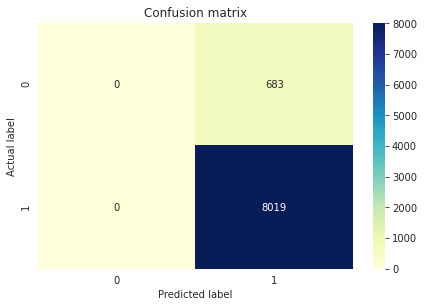

In [65]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9215122960239025
Precision: 0.9215122960239025
Recall: 1.0


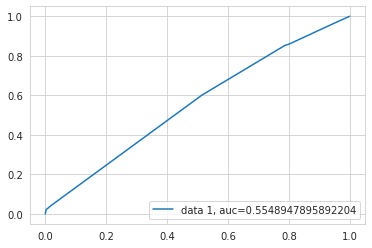

In [67]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [68]:
#Observation

# The model is based on chances seeing that the AUC score is 0.53.
# Precision value is 0.92 and the recall is 1, meaning that this model is 92% of the data was actually trending videos. However the recall is at 100%. This is confusing, does this mean 100% of the data was missed?
